In [7]:
import numpy as np
from matplotlib import pyplot as plt
import math
from pyerf import pyerf
from collections import Counter

class lin_interpol:
    def __init__(self,pair_x_fx):
        assert type(pair_x_fx) == list
        self.pair_x_fx = pair_x_fx
        
    def bins(self):
        bins =[]
        for i in range(len(self.pair_x_fx)-1):
            bins.append([self.pair_x_fx[i][0] , self.pair_x_fx[i+1][0]])
        return bins
        
        
    def coeficients(self):
        '''
        in the interval [x_i,x_i+1] we will think f(x) as
        p(x) = a*x + b
        the output is in the form of a list which it's elements are lists 
        with two elements [a,b]
        '''
        coeficients = []
        for i in range(len(self.pair_x_fx)-1):
            a = (self.pair_x_fx[i+1][1]-self.pair_x_fx[i][1])/(self.pair_x_fx[i+1][0]-self.pair_x_fx[i][0])
            b = self.pair_x_fx[i][1] - (self.pair_x_fx[i+1][1]-self.pair_x_fx[i][1])/(self.pair_x_fx[i+1][0]-self.pair_x_fx[i][0]) * self.pair_x_fx[i][0]
            coeficients.append([a,b])
        return coeficients
    
    def interpol(self, x):
        interpolation = []
        bins = lin_interpol(self.pair_x_fx).bins()
        coeficientes = lin_interpol(self.pair_x_fx).coeficients()
        
        for i in range(len(x)):
            for pair in range(len(bins)):
                if x[i] >= bins[pair][0] and x[i] <= bins[pair][1]:
                    interpolation.append([x[i],coeficientes[pair][0] * x[i] + coeficientes[pair][1]])
                    break
        return interpolation
    
    def derivative(self,x):
        coeficientes = lin_interpol(self.pair_x_fx).coeficients()
        bins = lin_interpol(self.pair_x_fx).bins()
        derivada = []
        for element in x:
            for j in range(len(bins)-1):
                if bins[j][0] <= element <= bins[j][1]:
                    derivada.append(coeficientes[j][0])
        return derivada
        
    
    def integral(self,x_min,x_max):
        integrando_x = [x_min]
        integral = []
        bins = lin_interpol(self.pair_x_fx).bins()
        coeficientes = lin_interpol(self.pair_x_fx).coeficients()
        
        a = []
        b = []
        for i in range(len(bins)):
            if bins[i][0] <= x_min <= bins[i][1]:
                a.append(coeficientes[i][0])
                b.append(coeficientes[i][1])
        
        
        for i in range(len(bins)):
            
            
            if bins[i][0] > x_min and bins[i][0] < x_max:
                integrando_x.append(bins[i][0])
                a.append(coeficientes[i][0])
                b.append(coeficientes[i][1])
        
        integrando_x.append(x_max)
        
        for i in range(len(integrando_x)-1):
            integral.append(a[i]*(integrando_x[i+1]**2 - integrando_x[i]**2)/2 + b[i]*(integrando_x[i+1] - integrando_x[i]))
            
        return sum(integral)
    
    
    def int_interpol(self,x):
        int_interpol = []
        for i in range(len(x)):
            int_interpol.append([x[i],lin_interpol(self.pair_x_fx).integral(self.pair_x_fx[0][0],x[i])])
        return int_interpol
        


class sampler:
    def __init__(self,distribution):
        assert type(distribution) == list
        self.distribution = distribution
        
        
    
    def sample(self, sample_size):
        x_distribution = []
        for pair in self.distribution:
            x_distribution.append(pair[0])
        
        cumulative = lin_interpol(self.distribution).int_interpol(x_distribution)
        inverse_cumulative = []
        for pair in cumulative:
            inverse_cumulative.append([pair[1],pair[0]])
        
        u = np.random.uniform(0,1,sample_size)
        inverse_cumulative_interpol = lin_interpol(inverse_cumulative).interpol(u)
        distribution_sample = []
        for pair in inverse_cumulative_interpol:
            distribution_sample.append(pair[1])
        return distribution_sample






def gaussian(mu,sigma,x):
    fx = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
    return fx
    
def gauss_cumulative(mu,sigma,x):
    cx = 1/2*(1+math.erf((x-mu)/(np.sqrt(2)*sigma)))
    return cx

def gauss_cumulative_inverser(mu,sigma,c):
    xc = pyerf.erfinv(2*c-1)*(np.sqrt(2)*sigma) + mu
    return xc

def binomial(n,r,p):
    P = p**r*(1-p)**(n-r)*(math.factorial(n)/(math.factorial(r)*math.factorial(n-r)))
    return P



class mean_estimators:
    def __init__(self,sample):
        self.sample = sample
    
    def arithimetic(self):
        mean = np.sum(self.sample)/len(self.sample)
        return mean
    
    def ten_first(self):
        m = 0
        for i in range(0,11):
            m += self.sample[i]
        mean = m/10
        return mean
    
    def arithimetic_1(self):
        mean = np.sum(self.sample)/(len(self.sample)-1)
        return mean
    
    def one_eight(self):
        return 1.8
    
    def geometric(self):
        mean = np.prod(self.sample)**(1/len(self.sample))
        return mean
    
    def mode(self):
        mean = Counter(self.sample)
        return mean.most_common(1)[0][0]
    
    def max_min_mean(self):
        mean = (min(self.sample)+max(self.sample))/2
        return mean
    
    
    def only_even(self):
        mean = 0
        interval = math.floor(len(self.sample)/2)
        for i in range (0,interval):
            mean += self.sample[2*i]
        mean = mean/interval        
        return mean
            
        


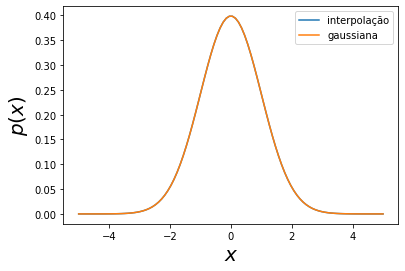

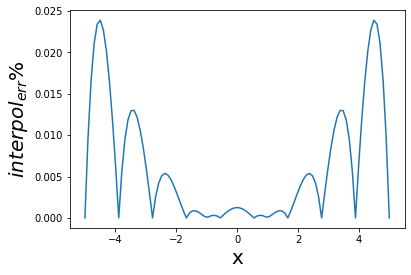

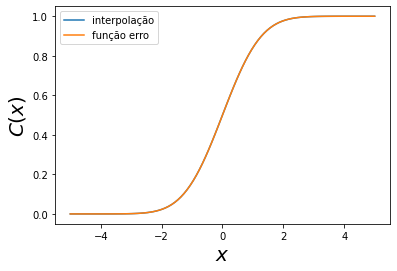

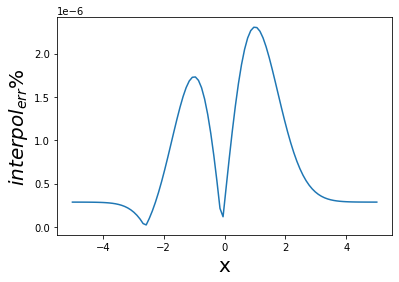

In [2]:
#Tarefa 1
pairs = []
x_bins = np.linspace(-5,5,1000)
for i in range(len(x_bins)):
    pairs.append([x_bins[i],gaussian(0,1,x_bins[i])])
        

        
x = np.linspace(-5,5,100)
f1 = lin_interpol(pairs)
gauss_interpolada = f1.interpol(x)



y_interpol = []
y_real = []
diff = []
for dupla in gauss_interpolada:
    y_interpol.append(dupla[1])
    y_real.append(gaussian(0,1,dupla[0]))
    diff.append(abs(dupla[1]-gaussian(0,1,dupla[0]))/gaussian(0,1,dupla[0])*100)
    




plt.plot(x,y_interpol,label = 'interpolação')
plt.plot(x,y_real,label = 'gaussiana')
plt.ylabel('$p(x)$',fontsize = 20)
plt.xlabel('$x$',fontsize = 20)
plt.legend()
plt.show()
plt.plot(x,diff)
plt.ylabel('$interpol_{err} \%$',fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.show()

integral_interpolada = f1.int_interpol(x)
y_int_interpol = []
y_int_real = []
diff = []
for dupla in integral_interpolada:
    y_int_interpol.append(dupla[1])
    y_int_real.append(gauss_cumulative(0,1,dupla[0]))
    diff.append(abs(dupla[1] - gauss_cumulative(0,1,dupla[0])))

plt.plot(x,y_int_interpol,label = 'interpolação')
plt.plot(x,y_int_real,label = 'função erro')
plt.ylabel('$C(x)$',fontsize = 20)
plt.xlabel('$x$',fontsize = 20)
plt.legend()
plt.show()
plt.plot(x,diff)
plt.ylabel('$interpol_{err} \%$',fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.show()

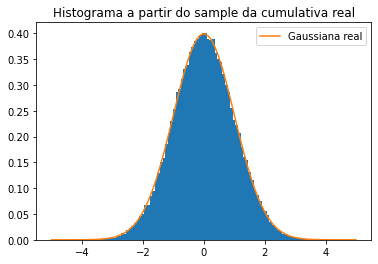

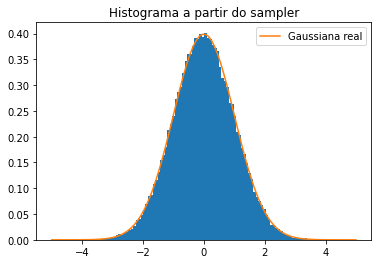

In [3]:
#Tarefa 2

#real
u = np.random.uniform(0,1,100000)
xc = []
for i in u:
    xc.append(gauss_cumulative_inverser(0,1,i))


plt.hist(xc,bins = 100,density =True)
plt.plot(x,y_real,label = 'Gaussiana real')
plt.legend()
plt.title('Histograma a partir do sample da cumulativa real')
plt.show()

#interpolada
sampler_gaussiano = sampler(pairs)
sample_gaussiano = sampler_gaussiano.sample(100000)

plt.hist(sample_gaussiano,bins = 100,density =True)
plt.plot(x,y_real,label = 'Gaussiana real')
plt.legend()
plt.title('Histograma a partir do sampler')
plt.show()
plt.show()

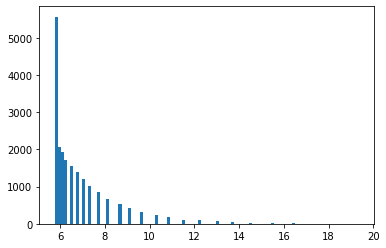

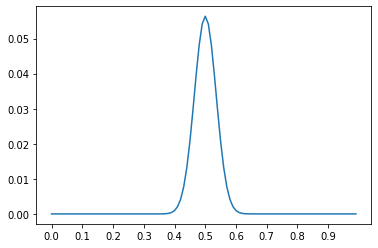

In [8]:
#Tarefa 3
n = 200
vez = 0
P = []
while vez < 20000:
    moeda = np.random.uniform(0,1,n)
    moeda.sort()
    cara = 0
    for element in moeda:
        if element <= 0.5:
                cara +=1
        else:
            break
    P.append(-2*np.log(binomial(n,cara,0.5)))
    vez +=1
    
plt.hist(P,bins=100)
plt.show()
###

n = 200
p = 0
p_list = []
P = []
cara = 0
moeda = np.random.uniform(0,1,n)
moeda.sort()
for element in moeda:
    if element <= 0.5:
        cara +=1
    else:
        break
while p < 1:
    p_list.append(p)
    P.append(binomial(n,cara,p))
    p += 0.01

plt.plot(p_list,P)
plt.xticks(np.arange(0, 1, step=0.1))
plt.show()

